# Trabajo Practico 1
**Integrantes**
  -  Davico, Cristian
  -  Speri, Sofia


**Objetivo:**

Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

# Punto 1

Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Cargar una imagen en modo monocromático (un canal)
img_1 = cv.imread('/coord_cromaticas/CoordCrom_1.png')
img_2 = cv.imread('/coord_cromaticas/CoordCrom_2.png')
img_3 = cv.imread('/coord_cromaticas/CoordCrom_3.png')

img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)

In [3]:
def get_crom_coord(img):
    r = img[:,:,0].astype(np.float32)
    g = img[:,:,1].astype(np.float32)
    b = img[:,:,2].astype(np.float32)

    rgb = r + g + b

    zero_mask = (rgb == 0)

    adj_r = np.zeros_like(r)
    adj_g = np.zeros_like(r)
    adj_b = np.zeros_like(r)

    #Normalizo los pixeles donde r+g+b no sea = 0. En el resto de los casos queda el array de 0
    adj_r[~zero_mask] = r[~zero_mask] / rgb[~zero_mask]
    adj_g[~zero_mask] = g[~zero_mask] / rgb[~zero_mask]
    adj_b[~zero_mask] = b[~zero_mask] / rgb[~zero_mask]

    adj_img = cv.merge([adj_r, adj_g, adj_b])

    return adj_img

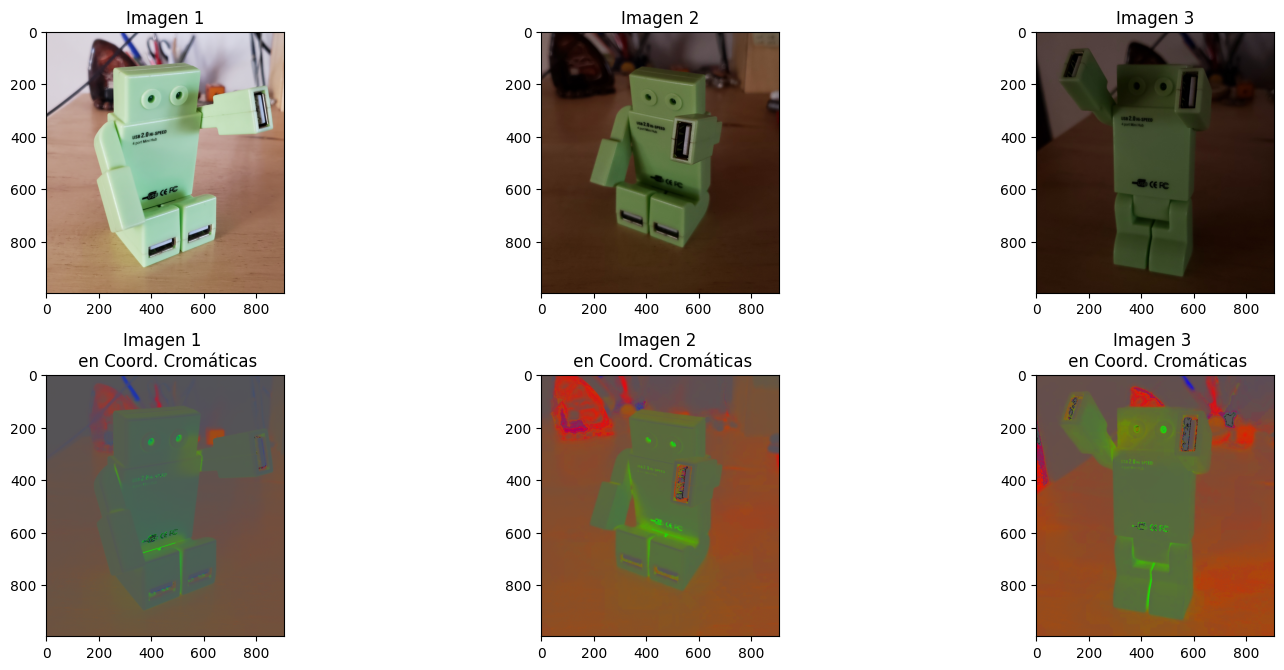

In [4]:
# GRAFICOS DE IMAGENES ORIGINALES VS COORD CROMATICAS
fig = plt.figure(figsize=(15, 10))

# IMG1
ax1=plt.subplot(331)
ax1.imshow(img_1)
ax1.set_title('Imagen 1')

# IMG1_CC
ax2=plt.subplot(334)
ax2.imshow(get_crom_coord(img_1))
ax2.set_title('Imagen 1 \n en Coord. Cromáticas')

# IMG2
ax3=plt.subplot(332)
ax3.imshow(img_2)
ax3.set_title('Imagen 2')

# IMG2_CC
ax4=plt.subplot(335)
ax4.imshow(get_crom_coord(img_2))
ax4.set_title('Imagen 2 \n en Coord. Cromáticas')

# IMG3
ax5=plt.subplot(333)
ax5.imshow(img_3)
ax5.set_title('Imagen 3')


# IMG3_CC
ax6=plt.subplot(336)
ax6.imshow(get_crom_coord(img_3))
ax6.set_title('Imagen 3 \n en Coord. Cromáticas')

plt.tight_layout()
plt.show()


# Punto 2
Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [5]:
# Cargar una imagen en modo monocromático (un canal)
img_4 = cv.imread('/white_patch/Test_blue.png')
img_5 = cv.imread('/white_patch/Test_green.png')
img_6 = cv.imread('/white_patch/Test_red.png')
img_7 = cv.imread('/white_patch/wp_blue.jpg')
img_8 = cv.imread('/white_patch/wp_green.png')
img_9 = cv.imread('/white_patch/wp_green2.jpg')
img_10 = cv.imread('/white_patch/wp_red.png')
img_11 = cv.imread('/white_patch/wp_red2.jpg')

img_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_6 = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
img_7 = cv.cvtColor(img_7, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
img_9 = cv.cvtColor(img_9, cv.COLOR_BGR2RGB)
img_10 = cv.cvtColor(img_10, cv.COLOR_BGR2RGB)
img_11 = cv.cvtColor(img_11, cv.COLOR_BGR2RGB)

In [6]:
def get_white_patch(img):
    r = img[:,:,0].astype(np.float32)
    g = img[:,:,1].astype(np.float32)
    b = img[:,:,2].astype(np.float32)

    max_r = np.max(r)
    max_g = np.max(g)
    max_b = np.max(b)

    r_zero_mask = (r == 0)
    g_zero_mask = (g == 0)
    b_zero_mask = (b == 0)

    adj_r = np.zeros_like(r)
    adj_g = np.zeros_like(r)
    adj_b = np.zeros_like(r)

    adj_r[~r_zero_mask] = (255 / max_r) * r[~r_zero_mask]
    adj_g[~g_zero_mask] = (255 / max_g) * g[~g_zero_mask]
    adj_b[~b_zero_mask] = (255 / max_b) * b[~b_zero_mask]

    adj_img = cv.merge([adj_r, adj_g, adj_b])

    adj_img = adj_img.clip(0, 255).astype(np.uint8)

    return adj_img

def white_patch(image):
    descriptor = image.copy()
    r_max=image[:,:,0].max()
    g_max=image[:,:,1].max()
    b_max=image[:,:,2].max()

    descriptor[:,:,0] = descriptor[:,:,0].astype(np.float32) * (255/r_max)
    descriptor[:,:,1] = descriptor[:,:,1].astype(np.float32) * (255/g_max)
    descriptor[:,:,2] = descriptor[:,:,2].astype(np.float32) * (255/b_max)


    return descriptor

In [7]:
new_img_4 = white_patch(img_4)
new_img_5 = white_patch(img_5)
new_img_6 = white_patch(img_6)
new_img_7 = white_patch(img_7)
new_img_8 = white_patch(img_8)
new_img_9 = white_patch(img_9)
new_img_10 = white_patch(img_10)
new_img_11 = white_patch(img_11)

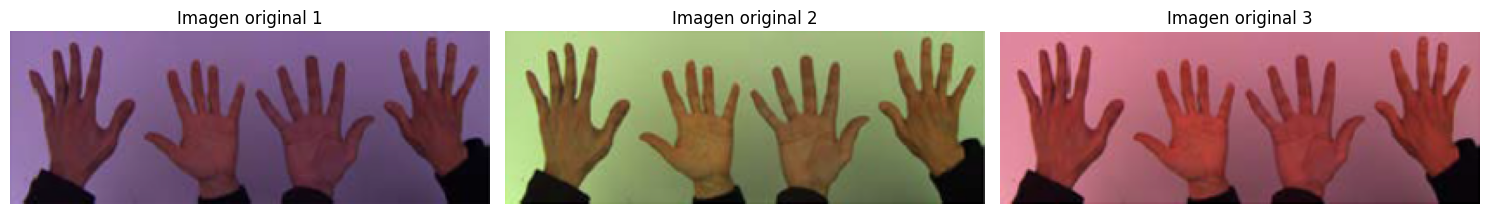

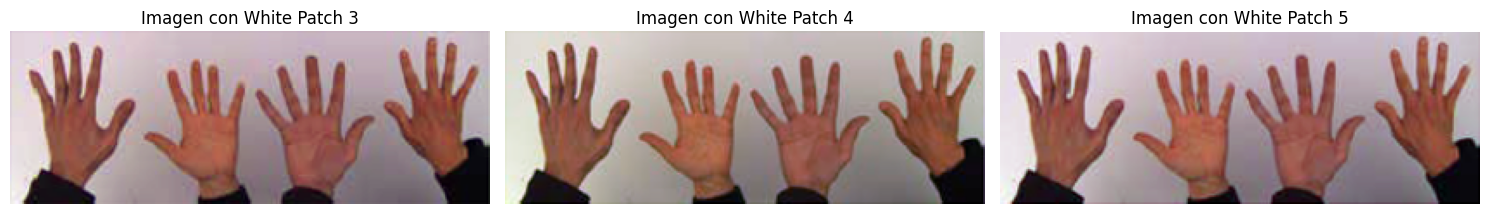

In [8]:
#GRAFICOS
images = [img_4, img_5, img_6, new_img_4, new_img_5, new_img_6]
# Crear una figura y ejes para mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Mostrar cada imagen en un subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f'Imagen original {i+1}')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

images = [img_4, img_5, img_6, new_img_4, new_img_5, new_img_6]
# Crear una figura y ejes para mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Mostrar cada imagen en un subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i+3])
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f'Imagen con White Patch {i+3}')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

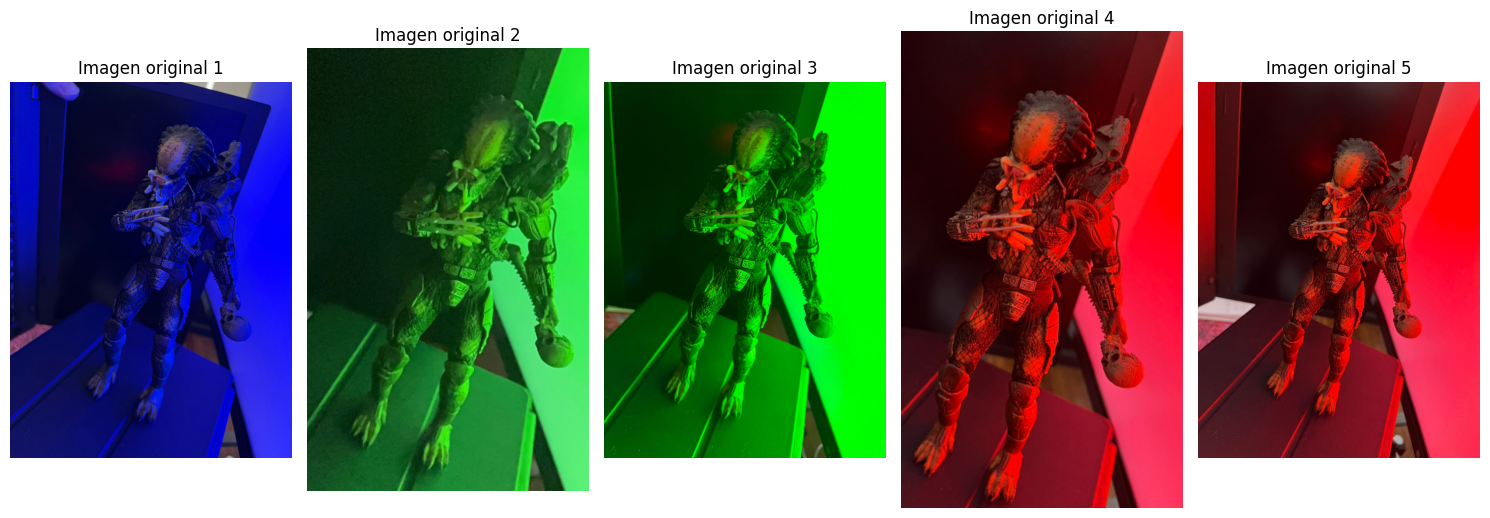

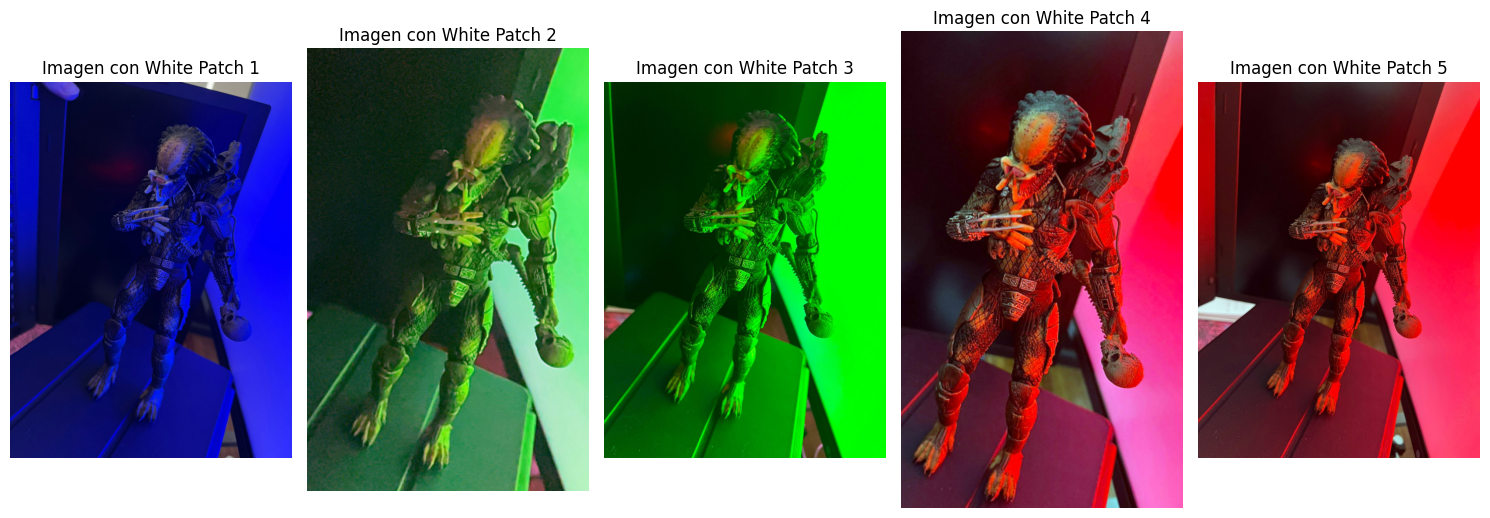

In [9]:
images = [img_7, img_8, img_9, img_10, img_11, new_img_7, new_img_8, new_img_9, new_img_10, new_img_11]
# Crear una figura y ejes para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

# Mostrar cada imagen en un subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f'Imagen original {i+1}')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

# Crear una figura y ejes para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 10))
# Mostrar cada imagen en un subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i+5])
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f'Imagen con White Patch {i+1}')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

- En el caso de las manos el algoritmo de White Patch performa bien; pero para el payaso vemos diferencia en la performance del algoritmo para las iagenes JPGE vs PNG. Vemos que eso se puede deber a la saturación inicial de la imágen JG que haga que muchospixeles estén ya en el valor de 255 por lo tanto la normalización devuelve el mismo pixel inicial

# Parte 2
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas

## Punto 1

Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [13]:
# Cargar una imagen en modo monocromático (un canal)
img_12 = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)
img_13 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

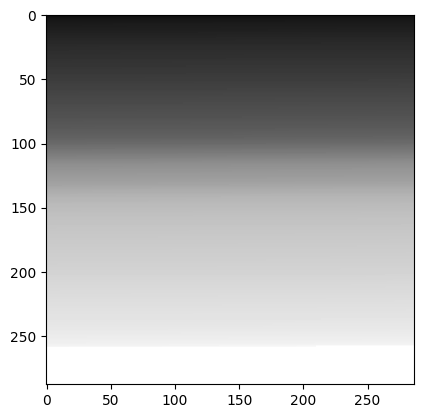

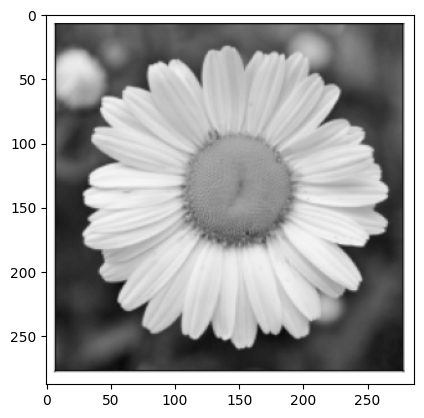

In [14]:
# Muestro la imagen con matplotlib
fig = plt.figure()
plt.imshow(img_12, cmap='gray')
plt.show()

fig = plt.figure()
plt.imshow(img_13, cmap='gray')
plt.show()

## Punto 2

Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

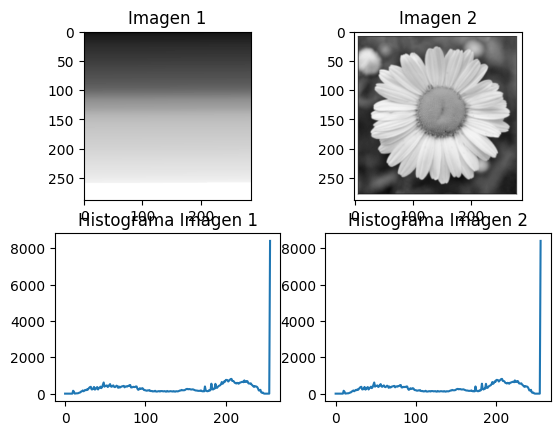

In [15]:
# Nueva figura
fig = plt.figure()

# Imagen 1
ax1=plt.subplot(221)
ax1.imshow(img_12, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen 1')

# Imagen 2
ax2=plt.subplot(222)
ax2.imshow(img_13, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen 2')

bins=256
# Histograma Imagen 1
ax3=plt.subplot(223)
hist1, bins1 = np.histogram(img_12.ravel(), bins, [0, 256])
plt.subplot(223), plt.plot(hist1),plt.title("Histograma Imagen 1")

# Histograma Imagen 2
ax4=plt.subplot(224)
hist2, bins2 = np.histogram(img_13.ravel(), bins, [0, 256])
plt.subplot(224), plt.plot(hist2),plt.title("Histograma Imagen 2")

plt.show()

Al analizar los histogramas lo que podemos observar es que:
1. Ambos histogramas son pracitcamente iguales a pesar de que las imagenes son morfológicamente distintas
2. Existe una gran cantidad de pixeles cuya intensidad esta saturada (Adiquieren valores de 255)
3. Dejando de lado los pixeles con intensidad saturada, podemos observar una distribucion similar a una bimodal
4. Si bien no es muy marcado, podríamos decir que las imagenes tienen más tonos claros (Entre 128 y 255) que oscuros (Entre 0 y 127)

En base estos puntos, principalmente el 1, entrenar un modelo de clasificación/detección de imagenes utilizando como único feature los histogramas de las imagenes anteriormente mostradas, no es una buena idea ya que podemos llegar a resultados erroneos en su predicción (tienen mismo histograma pero las imágenes son distintas)

Aún así, cabe mencionar que si lo que se buscara es identificar imagenes en relación a su intensidad (Por ejemplo la misma escena tomada de día o de noche), en estos casos puede llegar a ser util utilizar histogramas como parte de un set de features del modelo.

## Punto 3

Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

### Histogramas

In [16]:
img_14 = cv.imread('/content/segmentacion.png')

# Paso la imagen de BRG a RGB
img_14 = cv.cvtColor(img_14, cv.COLOR_BGR2RGB)

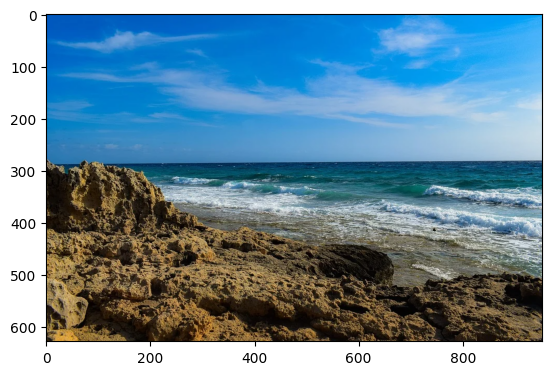

In [17]:
# Muestro la imagen con matplotlib
fig = plt.figure()
plt.imshow(img_14)
plt.show()

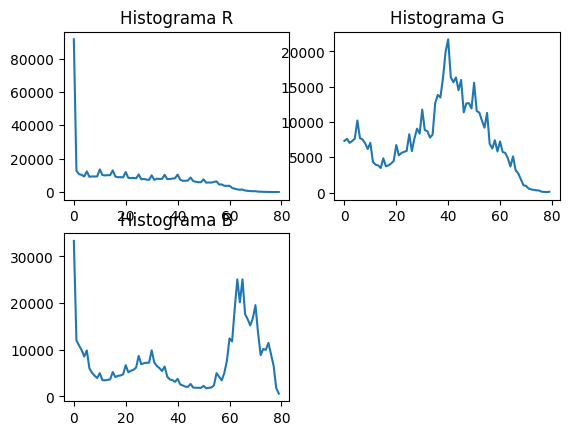

In [18]:
img_14_R, img_14_G, img_14_B = cv.split(img_14)

bins=80
# Histograma R
ax1=plt.subplot(221)
hist1, bins1 = np.histogram(img_14_R.ravel(), bins, [0, 256])
plt.subplot(221), plt.plot(hist1),plt.title("Histograma R")

# Histograma G
ax1=plt.subplot(222)
hist2, bins2 = np.histogram(img_14_G.ravel(), bins, [0, 256])
plt.subplot(222), plt.plot(hist2),plt.title("Histograma G")

# Histograma B
ax1=plt.subplot(223)
hist3, bins3 = np.histogram(img_14_B.ravel(), bins, [0, 256])
plt.subplot(223), plt.plot(hist3),plt.title("Histograma B")

plt.show()

**Histograma R (Rojo)**
- Distribución: Se observa una alta concentración de valores de intensidad bajos (cercanos a 0), lo que indica que hay muchas áreas en la imagen con baja intensidad de color rojo.
- Tendencia: La cantidad de píxeles disminuye rápidamente a medida que la intensidad aumenta.

**Histograma G (Verde)**
- Distribución: Este histograma muestra un pico significativo alrededor de una intensidad media (entre 30-60), indicando que hay muchas áreas en la imagen con una intensidad verde en ese rango.
- Tendencia: Hay una distribución más uniforme en los valores medios, y luego disminuye a medida que se acerca a valores altos.

**Histograma B (Azul)**
- Distribución: Similar al histograma rojo, se observa una alta concentración de valores de intensidad bajos, pero con un segundo pico más adelante (cerca de 60-70), indicando una presencia significativa de áreas con una intensidad azul más alta.
- Tendencia: La cantidad de píxeles disminuye inicialmente, pero luego aumenta de nuevo antes de disminuir hacia los valores más altos.

### Segmentación

#### Roca

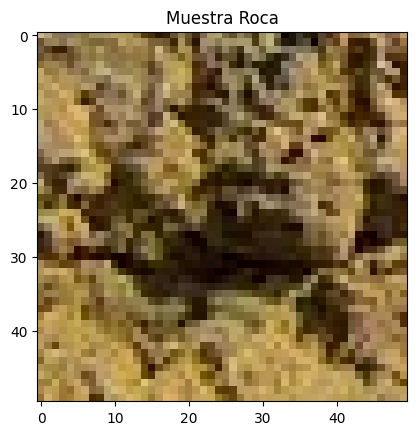

In [28]:
#Obtenemos muestra
rock_sample = img_14[430:480,10:60,:]

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(rock_sample)
plt.title('Muestra Roca')
plt.show()

In [20]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
rock_mean_color = cv.mean(rock_sample)[:3]

rock_mean_color

(126.0364, 101.33160000000001, 56.861200000000004)

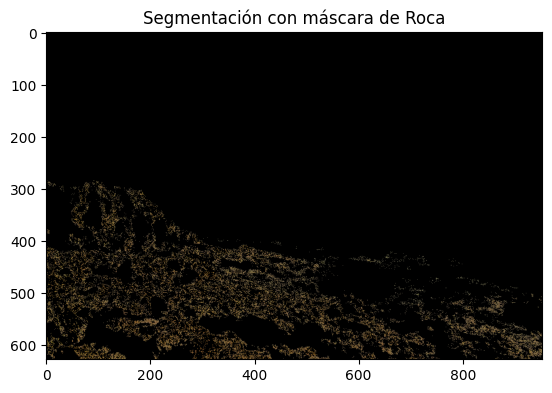

In [29]:
# Crear una máscara para la segmentación
tolerance = 25  # Ajusta la tolerancia según sea necesario
lower_bound = np.array([rock_mean_color[0] - tolerance, rock_mean_color[1] - tolerance, rock_mean_color[2] - tolerance])
upper_bound = np.array([rock_mean_color[0] + tolerance, rock_mean_color[1] + tolerance, rock_mean_color[2] + tolerance])

mask = cv.inRange(img_14, lower_bound, upper_bound)

# Aplicar la máscara a la imagen original
segmented_image = cv.bitwise_and(img_14, img_14, mask=mask)

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentación con máscara de Roca')
plt.show()

#### Mar

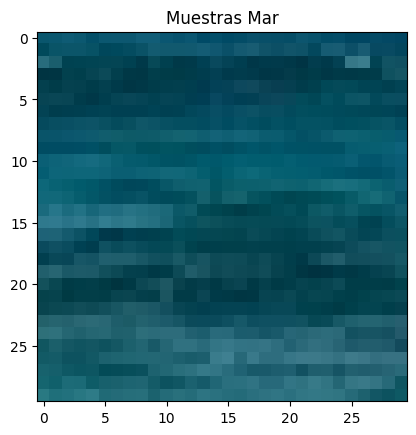

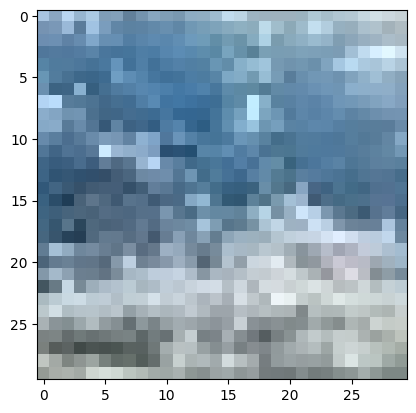

In [31]:
#Obtenemos muestra
sea_sample_1 = img_14[300:330,600:630,:]
sea_sample_2 = img_14[388:418,800:830,:]

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(sea_sample_1)
plt.title('Muestras Mar')
plt.show()

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(sea_sample_2)
plt.show()

In [23]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
sea_mean_color_1 = cv.mean(sea_sample_1)[:3]
sea_mean_color_2 = cv.mean(sea_sample_2)[:3]


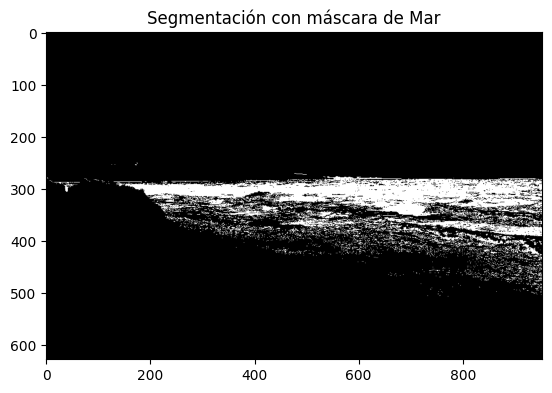

In [30]:
# Crear una máscara para la segmentación
tolerance = 30  # Ajusta la tolerancia según sea necesario
lower_bound_1 = np.array([sea_mean_color_1[0] - tolerance, sea_mean_color_1[1] - tolerance, sea_mean_color_1[2] - tolerance])
upper_bound_1 = np.array([sea_mean_color_1[0] + tolerance, sea_mean_color_1[1] + tolerance, sea_mean_color_1[2] + tolerance])

lower_bound_2 = np.array([sea_mean_color_2[0] - tolerance, sea_mean_color_2[1] - tolerance, sea_mean_color_2[2] - tolerance])
upper_bound_2 = np.array([sea_mean_color_2[0] + tolerance, sea_mean_color_2[1] + tolerance, sea_mean_color_2[2] + tolerance])

mask_1 = cv.inRange(img_14, lower_bound_1, upper_bound_1)
mask_2 = cv.inRange(img_14, lower_bound_2, upper_bound_2)

# Combinar las dos máscaras
segmented_image = cv.bitwise_or(mask_1, mask_2)

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentación con máscara de Mar')
plt.show()

#### Cielo

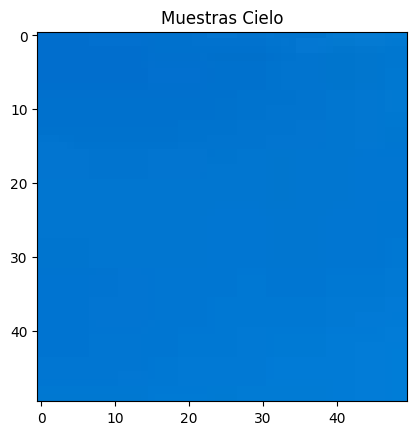

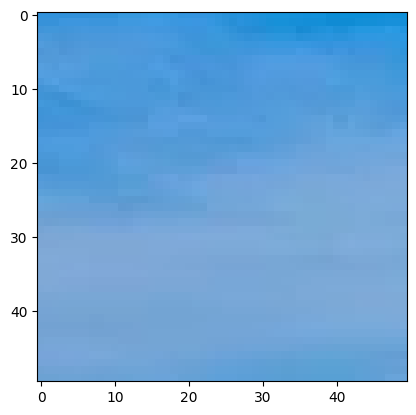

In [33]:
#Obtenemos muestra
sky_sample_1 = img_14[10:60,430:480,:]
sky_sample_2 = img_14[140:190,430:480,:]

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(sky_sample_1)
plt.title('Muestras Cielo')
plt.show()

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(sky_sample_2)
plt.show()

In [26]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
sky_mean_color_1 = cv.mean(sky_sample_1)[:3]
sky_mean_color_2 = cv.mean(sky_sample_2)[:3]

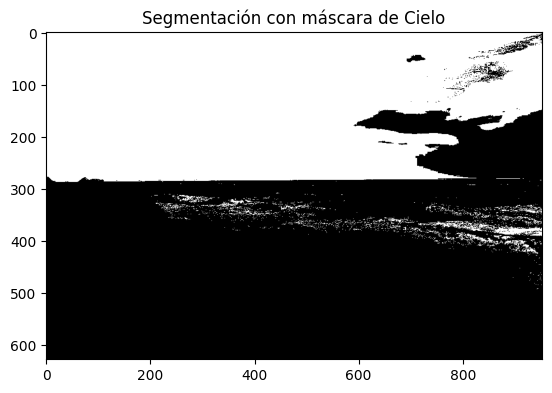

In [32]:
# Crear una máscara para la segmentación
tolerance = 50
lower_bound_1 = np.array([sky_mean_color_1[0] - tolerance, sky_mean_color_1[1] - tolerance, sky_mean_color_1[2] - tolerance])
upper_bound_1 = np.array([sky_mean_color_1[0] + tolerance, sky_mean_color_1[1] + tolerance, sky_mean_color_1[2] + tolerance])

lower_bound_2 = np.array([sky_mean_color_2[0] - tolerance, sky_mean_color_2[1] - tolerance, sky_mean_color_2[2] - tolerance])
upper_bound_2 = np.array([sky_mean_color_2[0] + tolerance, sky_mean_color_2[1] + tolerance, sky_mean_color_2[2] + tolerance])

mask_1 = cv.inRange(img_14, lower_bound_1, upper_bound_1)
mask_2 = cv.inRange(img_14, lower_bound_2, upper_bound_2)

# Combinar las dos máscaras
segmented_image = cv.bitwise_or(mask_1, mask_2)

# Muestra con matplotlib
fig = plt.figure()
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentación con máscara de Cielo')
plt.show()